In [1]:
#Import modules

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#Import data from CSV
combined_path = "output/true_combined.csv"
medicare_path = "Resources/Medicare_Enrollment_2017.csv"

In [3]:
#Import csvs
combined_df = pd.read_csv(combined_path)
medicare_df= pd.read_csv(medicare_path)

In [4]:
#Combine combined_df and medicare_df
combined_med_df=pd.DataFrame.merge(combined_df,medicare_df, on = ["State","County"])
combined_med_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Original Medicare
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0,5784
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0,28388
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0,4372
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0,2480
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0,6070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0,5641
3090,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0,3122
3091,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0,2804
3092,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0,1812


In [5]:
#Convert "Original Medicare to String

combined_med_df[["Original Medicare"]]=combined_med_df[["Original Medicare"]].apply(pd.to_numeric)


In [6]:
#Read data from CSV
combined_df = pd.read_csv(combined_path)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,TractSNAP,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,2682,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,6471,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,2097,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,1125,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,2900,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,835,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0
3094,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,128,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0
3095,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,621,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0
3096,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,337,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0


In [7]:
#FOOD ENVIRONMENT INDEX:

#Find the mean of the food environment index:
food_env_avg = combined_df["Food Environment Index"].mean()
print("The national Food Environment Index Average is: " + str(food_env_avg))

The national Food Environment Index Average is: 7.025338928340858


In [8]:
#Find the median of the food environment index:
food_env_med = combined_df["Food Environment Index"].median()
print("The national Food Environment Index Median is: " + str(food_env_med))

The national Food Environment Index Median is: 7.3


In [9]:
#FOOD ENVIRONMENT INDEX 

#Find the stats of the food environment index:
food_env_stats = combined_df["Food Environment Index"].describe()
food_env_stats

count    3098.000000
mean        7.025339
std         1.258195
min         0.000000
25%         6.400000
50%         7.300000
75%         7.900000
max        10.000000
Name: Food Environment Index, dtype: float64

In [10]:
#Calculate the 0.25 quantile. This is what will be used for the poor environment cutoff.
bottomquartile = combined_df["Food Environment Index"].quantile(q=0.25)
bottomquartile

6.4

In [11]:
#Group the food environments into "healthy" or "poor" environments based on the cutoff
healthy_env=combined_df.loc[combined_df["Food Environment Index"]>=bottomquartile]
poor_env=combined_df.loc[combined_df["Food Environment Index"]<bottomquartile]

In [12]:
#Creating bins based on max/min student budget values
bins = [0, float(bottomquartile), 10]
#bin names
ranges = ["Poor", "Healthy"]

In [13]:
#Slicing the data and placing into bins
pd.cut(combined_med_df["Food Environment Index"], bins, labels=ranges)

0       Healthy
1       Healthy
2          Poor
3       Healthy
4       Healthy
         ...   
3089    Healthy
3090    Healthy
3091    Healthy
3092    Healthy
3093    Healthy
Name: Food Environment Index, Length: 3094, dtype: category
Categories (2, object): [Poor < Healthy]

In [14]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = pd.cut(combined_med_df["Food Environment Index"], bins=bins, labels=ranges)
combined_med_df.reset_index(drop=True,inplace=True)

In [15]:
#Creating series for each parameter. Calculating the sum for Medicare enrollees and # of diabetics per category enrollment.
population_sum = combined_med_df.groupby("Environment Category")["Original Medicare"].sum()
diabetics_sum = combined_med_df.groupby("Environment Category")["# Diabetics"].sum()

In [16]:
#Create dataframe to hold data
popsum_byenv_df = pd.DataFrame(
    {"Medicare Population Total": population_sum,
    "Medicare Diabetic Total": diabetics_sum})

In [17]:
#Adding Percent Diabetic with Medicare
popsum_byenv_df["Percent Diabetic"]=(popsum_byenv_df["Medicare Diabetic Total"]/popsum_byenv_df["Medicare Population Total"])*100
percent_diabetic_df=popsum_byenv_df.reset_index()
percent_diabetic_df

,Environment Category,Medicare Population Total,Medicare Diabetic Total,Percent Diabetic
0,Poor,6314323,630891.0,9.991427
1,Healthy,31222101,2637842.0,8.448637


In [18]:
#Pie plot for Poor Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [630891,5683432]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Poor Food Environment')

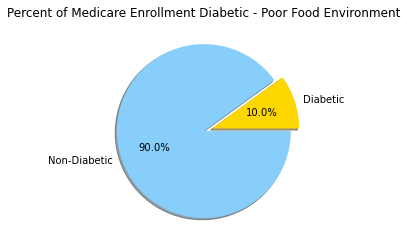

In [19]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Poor Food Environment")

In [20]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [2637842,28584259]
colors = ["slateblue", "thistle"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Healthy Food Environment')

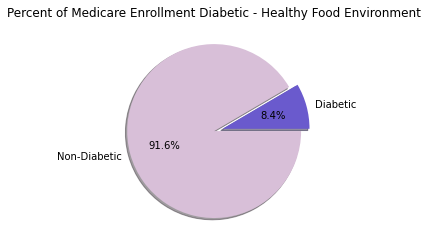

In [21]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Healthy Food Environment")

In [22]:
#Calculate the 0.10 quantile. This is what will be used for the poor environment cutoff.
#According to The Locator, 10% of the roughly 65,000 census tracts in the US are food deserts.
bottomten = combined_df["Food Environment Index"].quantile(q=0.10)
bottomten

5.5

In [23]:
#Group the food environments into "healthy" or "poor" environments based on the cutoff
healthy_ninety=combined_df.loc[combined_df["Food Environment Index"]>=bottomten]
poor_ten=combined_df.loc[combined_df["Food Environment Index"]<bottomten]

In [24]:
#Creating bins based on max/min student budget values
bins = [0, float(bottomten), 10]
#bin names
ranges = ["Food Desert", "Healthy"]

In [25]:
#Slicing the data and placing into bins
binned_if_desert = pd.cut(combined_med_df["Food Environment Index"], bins, labels=ranges)

In [26]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = binned_if_desert
combined_med_df.reset_index(drop=True,inplace=True)

In [27]:
#Creating series for each parameter. Calculating the sum for Medicare enrollees and # of diabetics per category enrollment.
population_total = combined_med_df.groupby("Environment Category")["Original Medicare"].sum()
diabetics_total = combined_med_df.groupby("Environment Category")["# Diabetics"].sum()

In [28]:
#Create dataframe to hold data
popsum_byenv__deserts_df = pd.DataFrame(
    {"Medicare Population Total": population_total,
    "Medicare Diabetic Total": diabetics_total})

In [29]:
#Adding Percent Diabetic with Medicare
popsum_byenv__deserts_df["Percent Diabetic"]=(popsum_byenv__deserts_df["Medicare Diabetic Total"]/popsum_byenv__deserts_df["Medicare Population Total"])*100
percent_diabetic2_df=popsum_byenv__deserts_df.reset_index()
percent_diabetic2_df

,Environment Category,Medicare Population Total,Medicare Diabetic Total,Percent Diabetic
0,Food Desert,1563000,159982.0,10.235573
1,Healthy,35973424,3108751.0,8.641799


In [30]:
#Pie plot for Food Desert Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [159982,1403018]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Food Desert')

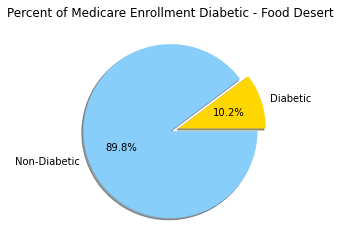

In [31]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Food Desert")

In [32]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [3108751,32864673]
colors = ["slateblue", "thistle"]
explode = (0.1,0)

Text(0.5, 1.0, 'Percent of Medicare Enrollment Diabetic - Non Food Desert')

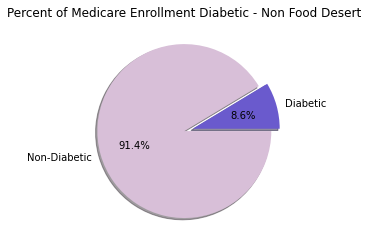

In [33]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Non Food Desert")

In [55]:
#Obesity

In [35]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = binned_if_desert
combined_med_df.reset_index(drop=True,inplace=True)

In [36]:
#Creating series for each parameter. Calculating the average obesity rate in each environment.
obesity_average = combined_med_df.groupby("Environment Category")["% Obese"].mean()

In [37]:
#Create dataframe to hold data
obesity_byenv_df = pd.DataFrame(
    {"Obesity Rate Average": obesity_average})
obesity_byenv_df

,Obesity Rate Average
Environment Category,
Food Desert,33.243243
Healthy,30.811594


In [38]:
#Pie plot for Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [33.243243,100-33.243243]
colors = ["#FF5768", "#c2b2b4"]
explode = (0.1,0)

Text(0.5, 1.0, 'Average Obesity Rate - Food Desert')

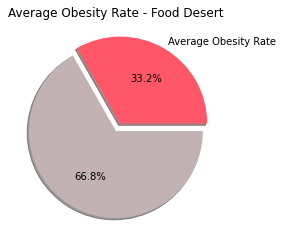

In [39]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Food Desert")

In [40]:
#Pie plot for Non-Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [30.811594,100-30.811594]
colors = ["#57ffee", "#b1c7c4"]
explode = (0.1,0)

Text(0.5, 1.0, 'Average Obesity Rate - Non Food Desert')

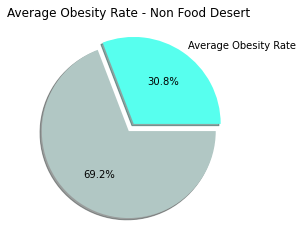

In [41]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Non Food Desert")

In [ ]:
#% Fair/Poor Health

In [ ]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = binned_if_desert
combined_med_df.reset_index(drop=True,inplace=True)

In [56]:
#Creating series for each parameter. Calculating the average fair/poor health rate in each environment.
poor_health_average = combined_med_df.groupby("Environment Category")["% Fair/Poor"].mean()

In [58]:
#Create dataframe to hold data
poorhealth_byenv_df = pd.DataFrame(
    {"Fair/Poor Health Rate Average": poor_health_average})
poorhealth_byenv_df

,Fair/Poor Health Rate Average
Environment Category,
Food Desert,21.615616
Healthy,16.455072


In [63]:
#Pie plot for Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [21.615616,100-21.615616]
colors = ["#33FFB5", "#c8dbd4"]
explode = (0.1,0)

Text(0.5, 1.0, 'Fair/Poor Health Rate - Food Desert')

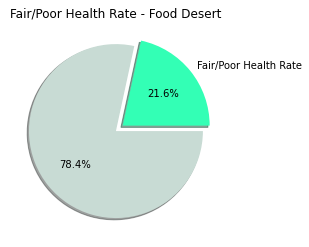

In [65]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Food Desert")

In [68]:
#Pie plot for Non-Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [16.455072,100-16.455072]
colors = ["#a588fc", "#d6d1e8"]
explode = (0.1,0)

Text(0.5, 1.0, 'Fair/Poor Health Rate - Non Food Desert')

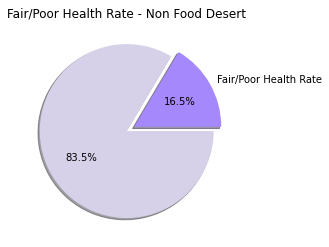

In [69]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Non Food Desert")

In [42]:
#Race breakdown
#Census defines race by five categories: White, Black, American Indian or Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Multiracial
#Added hispanic for breakdown purposes
#Calculate count of all race tracts:
whitetract=combined_med_df["TractWhite"].sum()
blacktract=combined_med_df["TractBlack"].sum()
asiantract=combined_med_df["TractAsian"].sum()
nhopitract=combined_med_df["TractNHOPI"].sum()
aiantract=combined_med_df["TractAIAN"].sum()
omultirtract=combined_med_df["TractOMultir"].sum()
hispanictract=combined_med_df["TractHispanic"].sum()

In [43]:
all_tract=whitetract+blacktract+asiantract+nhopitract+aiantract+hispanictract
all_tract

327957531

In [44]:
#Creating a column for food environment categories
combined_med_df["Environment Category"] = binned_if_desert
combined_med_df.reset_index(drop=True,inplace=True)

In [45]:
#Creating series for each parameter. Calculating the sum of enrollees by race, grouped by environment.
white_pop = combined_med_df.groupby("Environment Category")["TractWhite"].sum()
black_pop = combined_med_df.groupby("Environment Category")["TractBlack"].sum()
asian_pop = combined_med_df.groupby("Environment Category")["TractAsian"].sum()
nhopi_pop = combined_med_df.groupby("Environment Category")["TractNHOPI"].sum()
aian_pop = combined_med_df.groupby("Environment Category")["TractAIAN"].sum()
omultir_pop = combined_med_df.groupby("Environment Category")["TractOMultir"].sum()
hispanic_pop = combined_med_df.groupby("Environment Category")["TractHispanic"].sum()

In [46]:
#Create dataframe to hold data
race_sum_deserts_df = pd.DataFrame(
    {"White": white_pop,
    "Black": black_pop,
    "Asian": asian_pop,
    "NHOPI": nhopi_pop,
    "AIAN": aian_pop,
    "Other/Multi": omultir_pop,
    "Hispanic/Latinx": hispanic_pop})
race_sum_deserts_df.reset_index()

,Environment Category,White,Black,Asian,NHOPI,AIAN,Other/Multi,Hispanic/Latinx
0,Food Desert,6192366,4110488,178566,11556,439300,632889,999993
1,Healthy,215548737,33849445,14395563,524949,2451822,27294395,49250707


Text(0.5, 1.0, 'Non-Food Desert')

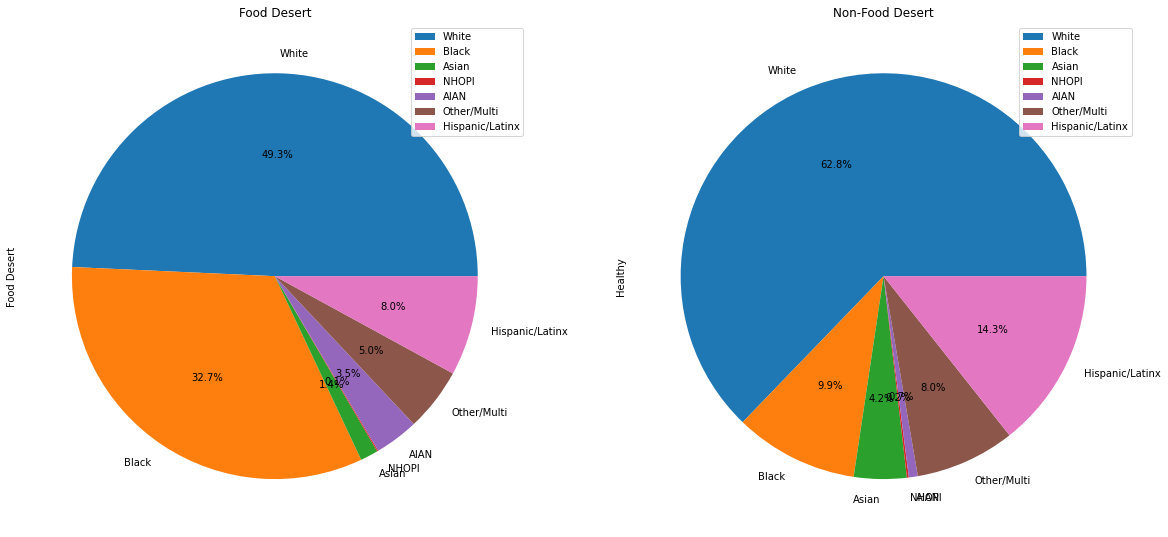

In [47]:
#Creating pie chart for Food Desert

race_pie =race_sum_deserts_df.T.plot.pie(subplots=True, figsize=(20,20),autopct='%1.1f%%')
race_pie[0].set_title("Food Desert")
race_pie[1].set_title("Non-Food Desert")


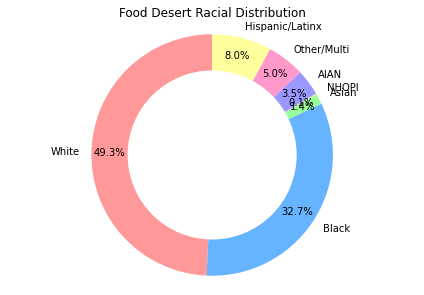

<Figure size 2160x3600 with 0 Axes>

In [48]:
#Race Pie Chart Easier to Read
#Food Desert:
# Pie chart
labels = ['White', 'Black', 'Asian', 'NHOPI','AIAN','Other/Multi','Hispanic/Latinx']
sizes = [6192366,4110488,178566,11556,439300,632889,999993]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ff99cc','#ffff9d']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Food Desert Racial Distribution")
fig=plt.figure(figsize=(30,50))
plt.show()


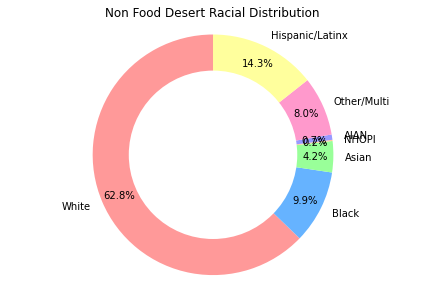

<Figure size 2160x3600 with 0 Axes>

In [49]:
#Race Pie Chart Easier to Read
#Non Food Desert:
# Pie chart
labels = ['White', 'Black', 'Asian', 'NHOPI','AIAN','Other/Multi','Hispanic/Latinx']
sizes = [215548737,33849445,14395563,524949,2451822,27294395,49250707]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ff99cc','#ffff9d']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Non Food Desert Racial Distribution")
fig=plt.figure(figsize=(30,50))
plt.show()


In [50]:
#Calculating death # in Food Desert environment
poor_env_deaths=poor_ten["# Deaths"].sum()
print(poor_env_deaths)

151237.0


In [51]:
#Calculating death # in Healthy environment
healthy_env_deaths=healthy_ninety["# Deaths"].sum()
print(healthy_env_deaths)

3255203.0


In [52]:
#Calculating nationwide death #
all_deaths=combined_df["# Deaths"].sum()
all_deaths

3406440.0

In [53]:
#Pie plot for Food Desert Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Deaths in Food Desert","Deaths in Healthy Environment"]
sizes =  [159982,1403018]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

In [54]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [3108751,32864673]
colors = ["slateblue", "thistle"]
explode = (0.1,0)